In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import seaborn as sns
plt.style.use('default') # para graficos matplotlib
plt.rcParams['figure.figsize'] = (10, 8)

sns.set(style="whitegrid") # grid seaborn

%config IPCompleter.greedy=True

In [2]:
df_props = pd.read_csv('train.csv')
df_props.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [3]:
mexico_states = geopandas.read_file('mexstates.shp')

In [4]:
mexico_states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 16 columns):
OBJECTID      32 non-null int64
FIPS_ADMIN    32 non-null object
GMI_ADMIN     32 non-null object
ADMIN_NAME    32 non-null object
FIPS_CNTRY    32 non-null object
GMI_CNTRY     32 non-null object
CNTRY_NAME    32 non-null object
POP_ADMIN     32 non-null int64
TYPE_ENG      32 non-null object
TYPE_LOC      32 non-null object
SQKM          32 non-null float64
SQMI          32 non-null float64
COLOR_MAP     32 non-null object
Shape_Leng    32 non-null float64
Shape_Area    32 non-null float64
geometry      32 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 4.1+ KB


In [5]:
mexico_states.head()

,OBJECTID,FIPS_ADMIN,GMI_ADMIN,ADMIN_NAME,FIPS_CNTRY,GMI_CNTRY,CNTRY_NAME,POP_ADMIN,TYPE_ENG,TYPE_LOC,SQKM,SQMI,COLOR_MAP,Shape_Leng,Shape_Area,geometry
0,888,MX06,MEX-CHH,Chihuahua,MX,MEX,Mexico,2656214,State,Estado,247935.02,95727.70,12,22.609277,22.890985,"POLYGON ((-103.63085937506 26.66107940648959, ..."
1,933,MX07,MEX-CDZ,Coahuila,MX,MEX,Mexico,2145539,State,Estado,150843.95,58240.87,2,18.993090,13.733655,"POLYGON ((-102.6669464107481 25.0758323669703,..."
2,976,MX19,MEX-NLE,Nuevo Leon,MX,MEX,Mexico,3370912,State,Estado,65173.05,25163.31,3,15.426171,5.844668,POLYGON ((-99.71389770501492 27.66893768322768...
3,978,MX28,MEX-TML,Tamaulipas,MX,MEX,Mexico,2272724,State,Estado,79502.24,30695.81,11,18.023144,7.056563,"POLYGON ((-98.616088867607 22.41849136378556, ..."
4,998,MX25,MEX-SIN,Sinaloa,MX,MEX,Mexico,2397706,State,Estado,57638.85,22254.36,5,16.466051,5.145524,POLYGON ((-108.3941802981821 25.14110946612914...


In [6]:
mexico_states = mexico_states.rename(columns = {'ADMIN_NAME': 'provincia'})

In [7]:
mexico_states.head()

,OBJECTID,FIPS_ADMIN,GMI_ADMIN,provincia,FIPS_CNTRY,GMI_CNTRY,CNTRY_NAME,POP_ADMIN,TYPE_ENG,TYPE_LOC,SQKM,SQMI,COLOR_MAP,Shape_Leng,Shape_Area,geometry
0,888,MX06,MEX-CHH,Chihuahua,MX,MEX,Mexico,2656214,State,Estado,247935.02,95727.70,12,22.609277,22.890985,"POLYGON ((-103.63085937506 26.66107940648959, ..."
1,933,MX07,MEX-CDZ,Coahuila,MX,MEX,Mexico,2145539,State,Estado,150843.95,58240.87,2,18.993090,13.733655,"POLYGON ((-102.6669464107481 25.0758323669703,..."
2,976,MX19,MEX-NLE,Nuevo Leon,MX,MEX,Mexico,3370912,State,Estado,65173.05,25163.31,3,15.426171,5.844668,POLYGON ((-99.71389770501492 27.66893768322768...
3,978,MX28,MEX-TML,Tamaulipas,MX,MEX,Mexico,2272724,State,Estado,79502.24,30695.81,11,18.023144,7.056563,"POLYGON ((-98.616088867607 22.41849136378556, ..."
4,998,MX25,MEX-SIN,Sinaloa,MX,MEX,Mexico,2397706,State,Estado,57638.85,22254.36,5,16.466051,5.145524,POLYGON ((-108.3941802981821 25.14110946612914...


In [8]:
# Determino si ambos dataframes contienen la misma cantidad de provincias

df_props.provincia.value_counts()

Distrito Federal         58790
Edo. de México           41607
Jalisco                  21238
Querétaro                16988
Nuevo León               15324
Puebla                   10421
San luis Potosí           8447
Yucatán                   7928
Morelos                   7337
Veracruz                  5762
Quintana Roo              4756
Chihuahua                 4590
Coahuila                  3695
Baja California Norte     3220
Sonora                    2988
Guanajuato                2860
Guerrero                  2678
Hidalgo                   2521
Michoacán                 2471
Tamaulipas                2303
Durango                   2275
Sinaloa                   1806
Aguascalientes            1753
Baja California Sur       1700
Nayarit                   1352
Chiapas                   1126
Colima                    1008
Tabasco                    994
Tlaxcala                   839
Oaxaca                     711
Campeche                   263
Zacatecas                   94
Name: pr

In [9]:
mexico_states.provincia.value_counts()

Veracruz               1
Aguascalientes         1
Zacatecas              1
Tamaulipas             1
Chiapas                1
Michoacan              1
Sonora                 1
Queretaro              1
Jalisco                1
Sinaloa                1
Tabasco                1
Nayarit                1
Puebla                 1
Baja California        1
Chihuahua              1
Mexico                 1
Hidalgo                1
Oaxaca                 1
Coahuila               1
Guerrero               1
Tlaxcala               1
Durango                1
Guanajuato             1
Morelos                1
Baja California Sur    1
San Luis Potosi        1
Yucatan                1
Nuevo Leon             1
Distrito Federal       1
Colima                 1
Campeche               1
Quintana Roo           1
Name: provincia, dtype: int64

In [10]:
precio_por_provincia = df_props.groupby(by = 'provincia').precio.mean().sort_values(ascending = False)
precio_por_provincia

provincia
Distrito Federal         3.471705e+06
Edo. de México           2.762465e+06
Nuevo León               2.717758e+06
Guerrero                 2.548742e+06
Quintana Roo             2.402967e+06
Jalisco                  2.367694e+06
Tabasco                  2.300480e+06
Puebla                   2.298404e+06
Morelos                  2.290088e+06
Querétaro                2.144109e+06
Yucatán                  2.036020e+06
Chiapas                  1.924126e+06
San luis Potosí          1.920425e+06
Veracruz                 1.889789e+06
Guanajuato               1.866959e+06
Chihuahua                1.744531e+06
Sinaloa                  1.634572e+06
Tamaulipas               1.589667e+06
Oaxaca                   1.575518e+06
Campeche                 1.570918e+06
Colima                   1.531380e+06
Coahuila                 1.505305e+06
Sonora                   1.483716e+06
Michoacán                1.478504e+06
Aguascalientes           1.477189e+06
Zacatecas                1.453748e+06
Na

In [11]:
# Tengo que pasar los nombres de las provincias a de mis datos a los mismos que los de shapefile
# Para eso voy a ordenarlos a ambos alfabeticamente y ver que onda
dict(precio_por_provincia.sort_values(ascending = True))

{'Baja California Norte': 767441.75,
 'Tlaxcala': 1080993.3408820024,
 'Durango': 1210388.9828571428,
 'Baja California Sur': 1216452.821764706,
 'Hidalgo': 1305550.5351051171,
 'Nayarit': 1426790.823964497,
 'Zacatecas': 1453747.7978723405,
 'Aguascalientes': 1477188.769537935,
 'Michoacán': 1478503.670578713,
 'Sonora': 1483715.8567603747,
 'Coahuila': 1505305.448985115,
 'Colima': 1531380.161706349,
 'Campeche': 1570917.8212927757,
 'Oaxaca': 1575517.8902953586,
 'Tamaulipas': 1589666.9782891881,
 'Sinaloa': 1634571.6445182725,
 'Chihuahua': 1744530.6126361657,
 'Guanajuato': 1866959.4325174824,
 'Veracruz': 1889788.5216938562,
 'San luis Potosí': 1920424.9595122528,
 'Chiapas': 1924125.7202486678,
 'Yucatán': 2036019.839556004,
 'Querétaro': 2144108.8953378857,
 'Morelos': 2290088.0092680934,
 'Puebla': 2298403.6419729395,
 'Tabasco': 2300480.2263581487,
 'Jalisco': 2367693.5765608815,
 'Quintana Roo': 2402966.9358704793,
 'Guerrero': 2548741.85660941,
 'Nuevo León': 2717757.654724

In [12]:
dict(mexico_states.provincia.value_counts())

{'Veracruz': 1,
 'Aguascalientes': 1,
 'Zacatecas': 1,
 'Tamaulipas': 1,
 'Chiapas': 1,
 'Michoacan': 1,
 'Sonora': 1,
 'Queretaro': 1,
 'Jalisco': 1,
 'Sinaloa': 1,
 'Tabasco': 1,
 'Nayarit': 1,
 'Puebla': 1,
 'Baja California': 1,
 'Chihuahua': 1,
 'Mexico': 1,
 'Hidalgo': 1,
 'Oaxaca': 1,
 'Coahuila': 1,
 'Guerrero': 1,
 'Tlaxcala': 1,
 'Durango': 1,
 'Guanajuato': 1,
 'Morelos': 1,
 'Baja California Sur': 1,
 'San Luis Potosi': 1,
 'Yucatan': 1,
 'Nuevo Leon': 1,
 'Distrito Federal': 1,
 'Colima': 1,
 'Campeche': 1,
 'Quintana Roo': 1}

In [13]:
def unificar_nombre_provincias(provincia):
    if (provincia == 'Baja California Norte'):
        return 'Baja California'
    elif (provincia == 'Michoacán'):
        return 'Michoacan'
    elif (provincia == 'San luis Potosí'):
        return 'San Luis Potosi'
    elif (provincia == 'Yucatán'):
        return 'Yucatan'
    elif (provincia == 'Querétaro'):
        return 'Queretaro'
    elif (provincia == 'Nuevo León'):
        return 'Nuevo Leon'
    elif (provincia == 'Edo. de México'):
        return 'Mexico'
    
    return provincia

In [14]:
df_props.provincia = df_props.provincia.apply(unificar_nombre_provincias)

In [15]:
df_props.provincia.value_counts()

Distrito Federal       58790
Mexico                 41607
Jalisco                21238
Queretaro              16988
Nuevo Leon             15324
Puebla                 10421
San Luis Potosi         8447
Yucatan                 7928
Morelos                 7337
Veracruz                5762
Quintana Roo            4756
Chihuahua               4590
Coahuila                3695
Baja California         3220
Sonora                  2988
Guanajuato              2860
Guerrero                2678
Hidalgo                 2521
Michoacan               2471
Tamaulipas              2303
Durango                 2275
Sinaloa                 1806
Aguascalientes          1753
Baja California Sur     1700
Nayarit                 1352
Chiapas                 1126
Colima                  1008
Tabasco                  994
Tlaxcala                 839
Oaxaca                   711
Campeche                 263
Zacatecas                 94
Name: provincia, dtype: int64

In [16]:
precio_por_provincia = df_props.groupby(by = 'provincia').precio.mean()

In [17]:
precio_por_provincia

provincia
Aguascalientes         1.477189e+06
Baja California        7.674418e+05
Baja California Sur    1.216453e+06
Campeche               1.570918e+06
Chiapas                1.924126e+06
Chihuahua              1.744531e+06
Coahuila               1.505305e+06
Colima                 1.531380e+06
Distrito Federal       3.471705e+06
Durango                1.210389e+06
Guanajuato             1.866959e+06
Guerrero               2.548742e+06
Hidalgo                1.305551e+06
Jalisco                2.367694e+06
Mexico                 2.762465e+06
Michoacan              1.478504e+06
Morelos                2.290088e+06
Nayarit                1.426791e+06
Nuevo Leon             2.717758e+06
Oaxaca                 1.575518e+06
Puebla                 2.298404e+06
Queretaro              2.144109e+06
Quintana Roo           2.402967e+06
San Luis Potosi        1.920425e+06
Sinaloa                1.634572e+06
Sonora                 1.483716e+06
Tabasco                2.300480e+06
Tamaulipas        

In [18]:
mexico_states = mexico_states.join(precio_por_provincia, on = 'provincia')

In [19]:
mexico_states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 17 columns):
OBJECTID      32 non-null int64
FIPS_ADMIN    32 non-null object
GMI_ADMIN     32 non-null object
provincia     32 non-null object
FIPS_CNTRY    32 non-null object
GMI_CNTRY     32 non-null object
CNTRY_NAME    32 non-null object
POP_ADMIN     32 non-null int64
TYPE_ENG      32 non-null object
TYPE_LOC      32 non-null object
SQKM          32 non-null float64
SQMI          32 non-null float64
COLOR_MAP     32 non-null object
Shape_Leng    32 non-null float64
Shape_Area    32 non-null float64
geometry      32 non-null object
precio        32 non-null float64
dtypes: float64(5), int64(2), object(10)
memory usage: 4.3+ KB


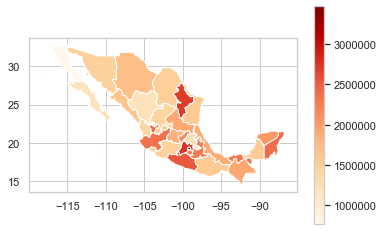

In [20]:
mexico_states.plot(column = 'precio', legend = True, cmap = 'OrRd')

In [21]:
plt.savefig('choropleth_precio_promedio_por_provincia.png')
plt.close()

In [22]:
mexico_states['precio_dolares'] = mexico_states['precio'].map(lambda x : x * 0.051)
mexico_states['precio_dolares']

0      88971.061244
1      76770.577898
2     138605.640391
3      81073.015893
4      83363.153870
5      61729.838126
6      74141.137691
7      97941.672935
8     120752.372405
9      75336.627246
10     96379.214606
11     95214.931058
12    109349.553662
13    103837.011817
14    122551.313729
15     66583.077290
16     80116.808886
17    117218.585741
18     75403.687200
19    140885.710537
20     55130.660385
21     78100.388247
22    177056.959372
23    116794.488473
24    129985.834687
25     80351.412405
26    117324.491544
27     98130.411733
28     75669.508695
29     39139.529250
30     62039.093910
31     72766.332022
Name: precio_dolares, dtype: float64

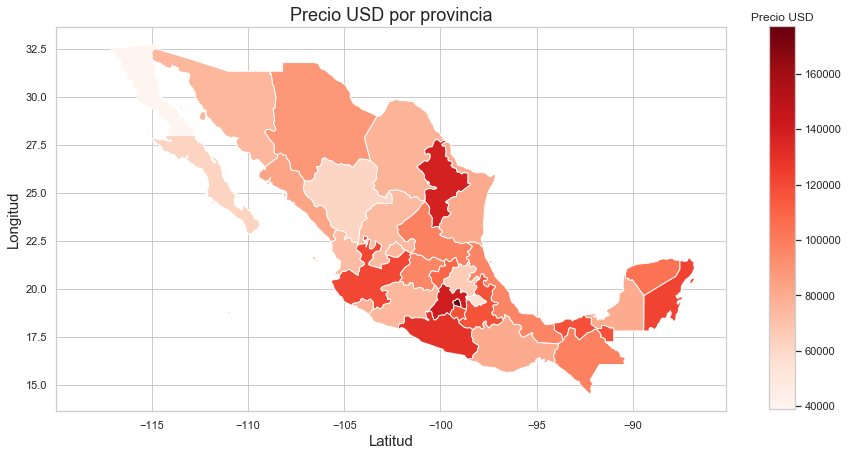

In [23]:

# plot as usual, grab the axes 'ax' returned by the plot
colormap = "Reds"   # add _r to reverse the colormap
ax = mexico_states.plot(column='precio_dolares', cmap=colormap, \
                figsize=[12,9], \
                vmin=min(mexico_states.precio_dolares), vmax=max(mexico_states.precio_dolares))
plt.xlabel('Latitud', fontsize = 15)
plt.ylabel('Longitud', fontsize = 15)
# map marginal/face deco
ax.set_title('Precio USD por provincia', fontsize = 18)

# colorbar will be created by ...
fig = ax.get_figure()
# add colorbar axes to the figure
# here, need trial-and-error to get [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.95, 0.21, 0.03, 0.59])   

cbax.set_title('Precio USD')
sm = plt.cm.ScalarMappable(cmap=colormap, \
                norm=plt.Normalize(vmin=min(mexico_states.precio_dolares), vmax=max(mexico_states.precio_dolares)))
# at this stage, 
# 'cbax' is just a blank axes, with un needed labels on x and y axes

# blank-out the array of the scalar mappable 'sm'
sm._A = []
# draw colorbar into 'cbax'
fig.colorbar(sm, cax=cbax, format="%d")

# dont use: plt.tight_layout()
plt.show()

In [24]:
mexico_states.sort_values(by = 'precio_dolares', ascending = False)[['provincia', 'precio_dolares']]

,provincia,precio_dolares
22,Distrito Federal,177056.959372
19,Mexico,140885.710537
2,Nuevo Leon,138605.640391
24,Guerrero,129985.834687
14,Quintana Roo,122551.313729
8,Jalisco,120752.372405
26,Tabasco,117324.491544
17,Puebla,117218.585741
23,Morelos,116794.488473
12,Queretaro,109349.553662


<BarContainer object of 32 artists>

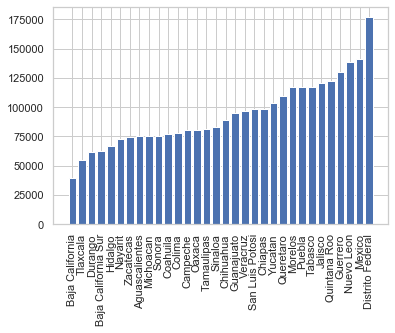

In [25]:
plt.xticks(rotation = 'vertical')
plt.bar(x = 'provincia', height = 'precio_dolares', width = 0.8, data = mexico_states.sort_values(by = 'precio_dolares', ascending = True))

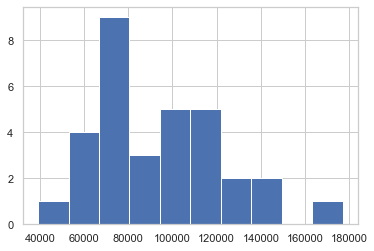

In [26]:
mexico_states['precio_dolares'].hist()

In [27]:
# Filtro las filas que tengan coordenadas validas
df_coordenadas = df_props[df_props['lat'].notnull() & df_props['lng'].notnull()]
df_coordenadas.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Mexico,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.0,2.0,1.0,...,23650.0,19.300612,-99.148475,2014-03-18 00:00:00,0.0,0.0,0.0,0.0,1.0,1100000.0
6,139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,NaN,Oaxaca de Juárez,Oaxaca,NaN,3.0,1.0,...,73510.0,17.143504,-96.803504,2016-02-23 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0
7,5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2.0,4.0,2.0,...,130510.0,20.672612,-87.037968,2016-10-20 00:00:00,0.0,0.0,0.0,0.0,0.0,4200000.0


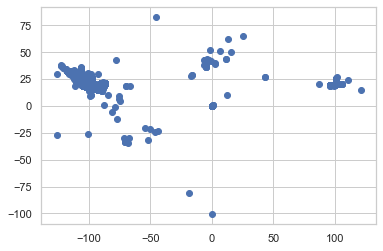

In [28]:
plt.scatter(x = 'lng',y = 'lat',data = df_coordenadas)

In [29]:
df_props.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [30]:
df_props.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [31]:
# Observo la antiguedad por provincia

antiguedad_por_provincia = df_props.groupby(by = 'provincia').antiguedad.mean().sort_values(ascending = True)
antiguedad_por_provincia

provincia
Baja California Sur     2.459770
Yucatan                 3.070534
Hidalgo                 3.472246
Tlaxcala                3.688034
Queretaro               3.701341
Campeche                3.914573
San Luis Potosi         3.978120
Quintana Roo            4.541362
Puebla                  4.545640
Veracruz                4.631214
Nayarit                 4.677146
Durango                 4.993980
Tabasco                 5.298992
Oaxaca                  5.404722
Chiapas                 5.412871
Tamaulipas              5.550216
Colima                  5.674877
Guanajuato              5.729194
Baja California         5.788405
Sonora                  5.942609
Sinaloa                 6.149014
Coahuila                6.306214
Zacatecas               6.397590
Morelos                 6.456293
Chihuahua               6.518198
Jalisco                 6.635517
Michoacan               7.061213
Aguascalientes          7.524580
Nuevo Leon              7.539231
Guerrero                7.605657


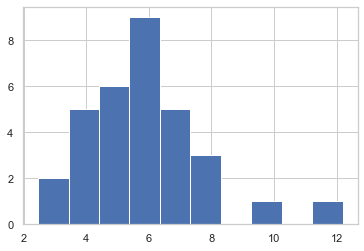

In [32]:
antiguedad_por_provincia.hist()

In [33]:
antiguedad_por_provincia.mean()

5.715216171205182

In [34]:
df_props.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Mexico,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [35]:
mexico_states = mexico_states.join(antiguedad_por_provincia, on = 'provincia')

In [36]:
mexico_states.head()

,OBJECTID,FIPS_ADMIN,GMI_ADMIN,provincia,FIPS_CNTRY,GMI_CNTRY,CNTRY_NAME,POP_ADMIN,TYPE_ENG,TYPE_LOC,SQKM,SQMI,COLOR_MAP,Shape_Leng,Shape_Area,geometry,precio,precio_dolares,antiguedad
0,888,MX06,MEX-CHH,Chihuahua,MX,MEX,Mexico,2656214,State,Estado,247935.02,95727.70,12,22.609277,22.890985,"POLYGON ((-103.63085937506 26.66107940648959, ...",1.744531e+06,88971.061244,6.518198
1,933,MX07,MEX-CDZ,Coahuila,MX,MEX,Mexico,2145539,State,Estado,150843.95,58240.87,2,18.993090,13.733655,"POLYGON ((-102.6669464107481 25.0758323669703,...",1.505305e+06,76770.577898,6.306214
2,976,MX19,MEX-NLE,Nuevo Leon,MX,MEX,Mexico,3370912,State,Estado,65173.05,25163.31,3,15.426171,5.844668,POLYGON ((-99.71389770501492 27.66893768322768...,2.717758e+06,138605.640391,7.539231
3,978,MX28,MEX-TML,Tamaulipas,MX,MEX,Mexico,2272724,State,Estado,79502.24,30695.81,11,18.023144,7.056563,"POLYGON ((-98.616088867607 22.41849136378556, ...",1.589667e+06,81073.015893,5.550216
4,998,MX25,MEX-SIN,Sinaloa,MX,MEX,Mexico,2397706,State,Estado,57638.85,22254.36,5,16.466051,5.145524,POLYGON ((-108.3941802981821 25.14110946612914...,1.634572e+06,83363.153870,6.149014


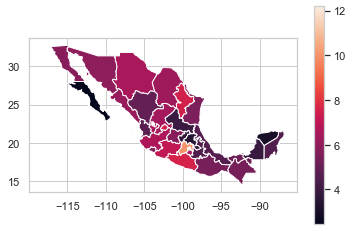

In [37]:
mexico_states.plot(column = 'antiguedad', legend = True)

In [38]:
df_props.provincia.value_counts()

Distrito Federal       58790
Mexico                 41607
Jalisco                21238
Queretaro              16988
Nuevo Leon             15324
Puebla                 10421
San Luis Potosi         8447
Yucatan                 7928
Morelos                 7337
Veracruz                5762
Quintana Roo            4756
Chihuahua               4590
Coahuila                3695
Baja California         3220
Sonora                  2988
Guanajuato              2860
Guerrero                2678
Hidalgo                 2521
Michoacan               2471
Tamaulipas              2303
Durango                 2275
Sinaloa                 1806
Aguascalientes          1753
Baja California Sur     1700
Nayarit                 1352
Chiapas                 1126
Colima                  1008
Tabasco                  994
Tlaxcala                 839
Oaxaca                   711
Campeche                 263
Zacatecas                 94
Name: provincia, dtype: int64

In [39]:
df_props.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

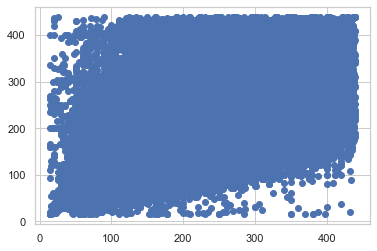

In [40]:
plt.scatter(x= 'metroscubiertos',y = 'metrostotales',data = df_props)

In [41]:
# Analizar las propiedades mas grandes por provincia
# Analizar el valor/metroCuadrado por provincia


In [42]:
df_props.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Mexico,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [43]:
df_props.tipodepropiedad.value_counts()

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: tipodepropiedad, dtype: int64

In [44]:
df_props['antiguedad'].value_counts()

0.0     50335
5.0     33268
10.0    28844
20.0    19904
1.0     12353
4.0      7944
3.0      5616
2.0      5059
15.0     3965
6.0      3169
30.0     3055
8.0      2418
25.0     2297
7.0      2046
12.0     1492
11.0     1434
40.0     1347
50.0     1193
9.0      1065
35.0      938
18.0      908
21.0      742
16.0      700
14.0      616
13.0      577
17.0      529
22.0      448
28.0      396
26.0      369
45.0      329
        ...  
47.0       40
55.0       38
48.0       36
46.0       31
70.0       29
41.0       27
80.0       27
53.0       17
49.0       17
65.0       17
52.0       11
58.0       10
54.0        9
75.0        6
66.0        5
59.0        5
69.0        5
67.0        4
57.0        4
63.0        4
62.0        3
56.0        3
74.0        2
68.0        2
79.0        2
61.0        2
76.0        2
71.0        1
77.0        1
64.0        1
Name: antiguedad, Length: 78, dtype: int64

In [45]:
# Cantidad de publicaciones por provincias
publicaciones_por_provincia = df_props.provincia.value_counts()
publicaciones_por_provincia = pd.DataFrame(data = publicaciones_por_provincia)
publicaciones_por_provincia = publicaciones_por_provincia.reset_index()
publicaciones_por_provincia = publicaciones_por_provincia.rename(columns = {'provincia': 'publicaciones', 'index': 'provincia'})
publicaciones_por_provincia = pd.DataFrame(publicaciones_por_provincia)

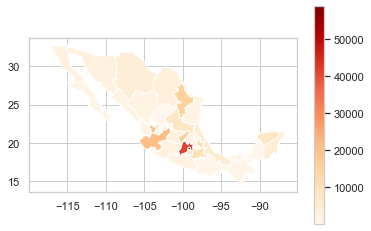

In [46]:
df_publicaciones = mexico_states.sort_values(by = 'provincia')
df_publicaciones = df_publicaciones.reset_index(drop = True)
publicaciones_por_provincia = publicaciones_por_provincia.sort_values(by = 'provincia')
publicaciones_por_provincia = publicaciones_por_provincia.reset_index(drop = True)
df_publicaciones['publicaciones'] = publicaciones_por_provincia['publicaciones']
df_publicaciones[['provincia', 'publicaciones']]
df_publicaciones.plot(column = 'publicaciones', cmap='OrRd', legend = True)

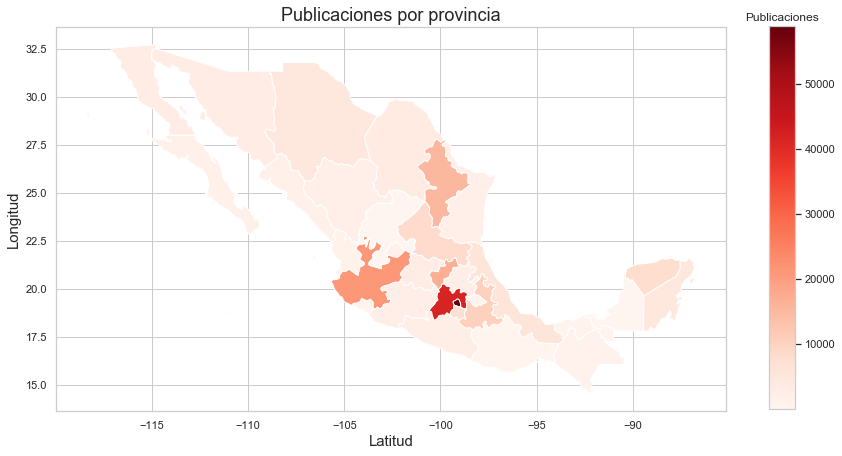

In [47]:
# plot as usual, grab the axes 'ax' returned by the plot
colormap = "Reds"   # add _r to reverse the colormap
ax = df_publicaciones.plot(column='publicaciones', cmap=colormap, \
                figsize=[12,9], \
                vmin=min(df_publicaciones.publicaciones), vmax=max(df_publicaciones.publicaciones))
plt.xlabel('Latitud', fontsize = 15)
plt.ylabel('Longitud', fontsize = 15)
# map marginal/face deco
ax.set_title('Publicaciones por provincia', fontsize = 18)

# colorbar will be created by ...
fig = ax.get_figure()
# add colorbar axes to the figure
# here, need trial-and-error to get [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.95, 0.21, 0.03, 0.59])   

cbax.set_title('Publicaciones')
sm = plt.cm.ScalarMappable(cmap=colormap, \
                norm=plt.Normalize(vmin=min(df_publicaciones.publicaciones), vmax=max(df_publicaciones.publicaciones)))
# at this stage, 
# 'cbax' is just a blank axes, with un needed labels on x and y axes

# blank-out the array of the scalar mappable 'sm'
sm._A = []
# draw colorbar into 'cbax'
fig.colorbar(sm, cax=cbax, format="%d")

# dont use: plt.tight_layout()
plt.show()

In [48]:
df_metrostotales = df_props[(df_props['metrostotales'].notnull())].groupby(by = 'provincia').metrostotales.mean()

In [49]:
mexico_states = mexico_states.join(df_metrostotales, on = 'provincia')

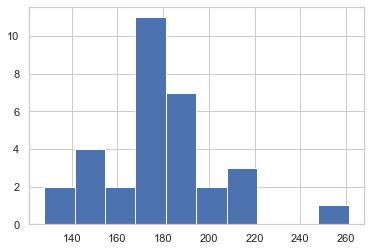

In [50]:
mexico_states.metrostotales.hist()

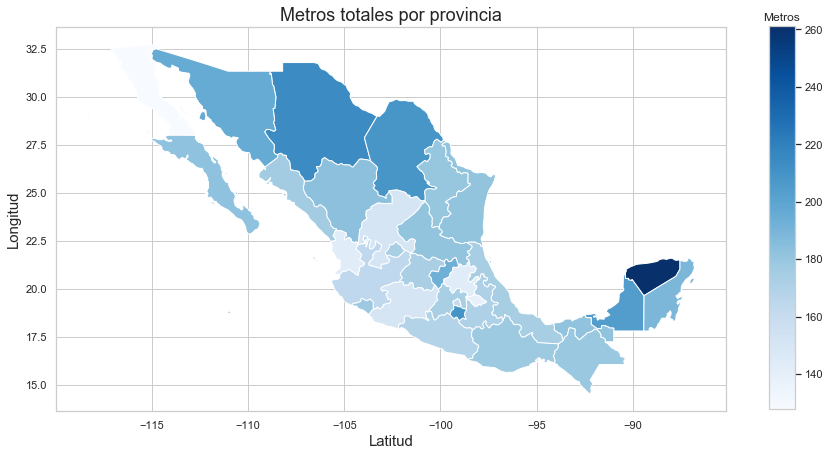

In [51]:
# plot as usual, grab the axes 'ax' returned by the plot
colormap = "Blues"   # add _r to reverse the colormap
ax = mexico_states.plot(column='metrostotales', cmap=colormap, \
                figsize=[12,9], \
                vmin=min(mexico_states.metrostotales), vmax=max(mexico_states.metrostotales))
plt.xlabel('Latitud', fontsize = 15)
plt.ylabel('Longitud', fontsize = 15)
# map marginal/face deco
ax.set_title('Metros totales por provincia', fontsize = 18)

# colorbar will be created by ...
fig = ax.get_figure()
# add colorbar axes to the figure
# here, need trial-and-error to get [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.95, 0.21, 0.03, 0.59])   

cbax.set_title('Metros')
sm = plt.cm.ScalarMappable(cmap=colormap, \
                norm=plt.Normalize(vmin=min(mexico_states.metrostotales), vmax=max(mexico_states.metrostotales)))
# at this stage, 
# 'cbax' is just a blank axes, with un needed labels on x and y axes

# blank-out the array of the scalar mappable 'sm'
sm._A = []
# draw colorbar into 'cbax'
fig.colorbar(sm, cax=cbax, format="%d")

# dont use: plt.tight_layout()
plt.show()


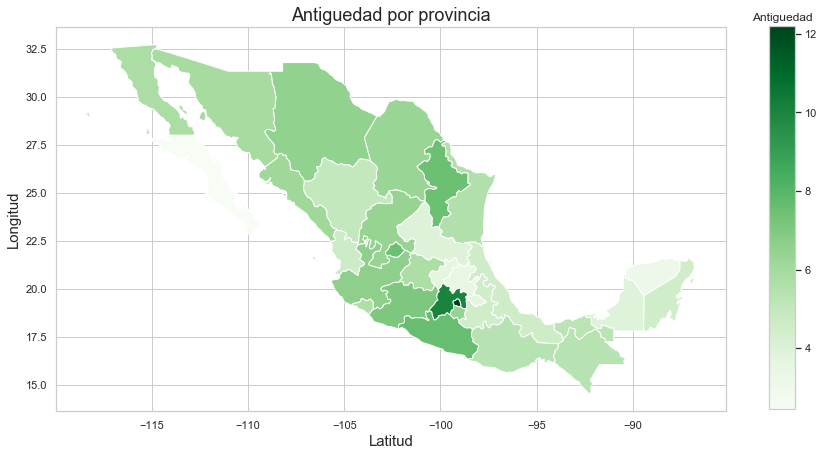

In [52]:
# plot as usual, grab the axes 'ax' returned by the plot
colormap = "Greens"   # add _r to reverse the colormap
ax = mexico_states.plot(column='antiguedad', cmap=colormap, \
                figsize=[12,9], \
                vmin=min(mexico_states.antiguedad), vmax=max(mexico_states.antiguedad))
plt.xlabel('Latitud', fontsize = 15)
plt.ylabel('Longitud', fontsize = 15)
# map marginal/face deco
ax.set_title('Antiguedad por provincia', fontsize = 18)

# colorbar will be created by ...
fig = ax.get_figure()
# add colorbar axes to the figure
# here, need trial-and-error to get [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.95, 0.21, 0.03, 0.59])   

cbax.set_title('Antiguedad')
sm = plt.cm.ScalarMappable(cmap=colormap, \
                norm=plt.Normalize(vmin=min(mexico_states.antiguedad), vmax=max(mexico_states.antiguedad)))
# at this stage, 
# 'cbax' is just a blank axes, with un needed labels on x and y axes

# blank-out the array of the scalar mappable 'sm'
sm._A = []
# draw colorbar into 'cbax'
fig.colorbar(sm, cax=cbax, format="%d")

# dont use: plt.tight_layout()
plt.show()

In [53]:
df_props.antiguedad.value_counts()

0.0     50335
5.0     33268
10.0    28844
20.0    19904
1.0     12353
4.0      7944
3.0      5616
2.0      5059
15.0     3965
6.0      3169
30.0     3055
8.0      2418
25.0     2297
7.0      2046
12.0     1492
11.0     1434
40.0     1347
50.0     1193
9.0      1065
35.0      938
18.0      908
21.0      742
16.0      700
14.0      616
13.0      577
17.0      529
22.0      448
28.0      396
26.0      369
45.0      329
        ...  
47.0       40
55.0       38
48.0       36
46.0       31
70.0       29
41.0       27
80.0       27
53.0       17
49.0       17
65.0       17
52.0       11
58.0       10
54.0        9
75.0        6
66.0        5
59.0        5
69.0        5
67.0        4
57.0        4
63.0        4
62.0        3
56.0        3
74.0        2
68.0        2
79.0        2
61.0        2
76.0        2
71.0        1
77.0        1
64.0        1
Name: antiguedad, Length: 78, dtype: int64

In [54]:
df_metrostotales = df_props[df_props.metrostotales.notnull()]
df_metrostotales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188533 entries, 0 to 239998
Data columns (total 23 columns):
id                            188533 non-null int64
titulo                        184765 non-null object
descripcion                   187346 non-null object
tipodepropiedad               188496 non-null object
direccion                     145808 non-null object
ciudad                        188259 non-null object
provincia                     188424 non-null object
antiguedad                    154333 non-null float64
habitaciones                  170403 non-null float64
garages                       160858 non-null float64
banos                         167403 non-null float64
metroscubiertos               171133 non-null float64
metrostotales                 188533 non-null float64
idzona                        165983 non-null float64
lat                           91509 non-null float64
lng                           91509 non-null float64
fecha                         18853

In [55]:
df_props.groupby(by = 'provincia').metrostotales.mean().sort_values()

provincia
Baja California        128.017080
Tlaxcala               138.093878
Hidalgo                143.103038
Nayarit                143.555000
Zacatecas              150.939759
Michoacan              151.027519
Distrito Federal       161.503146
Jalisco                164.194235
Guerrero               169.193662
Puebla                 170.679735
Guanajuato             172.916734
Aguascalientes         173.284826
Mexico                 173.397345
Veracruz               174.073229
Sinaloa                175.840000
Oaxaca                 178.123980
Colima                 178.943596
Chiapas                179.228690
Nuevo Leon             180.023322
San Luis Potosi        181.764848
Tamaulipas             181.859500
Tabasco                182.074300
Baja California Sur    182.840849
Durango                184.109168
Quintana Roo           189.256730
Queretaro              193.443813
Sonora                 196.222181
Campeche               204.650655
Coahuila               208.891884
More

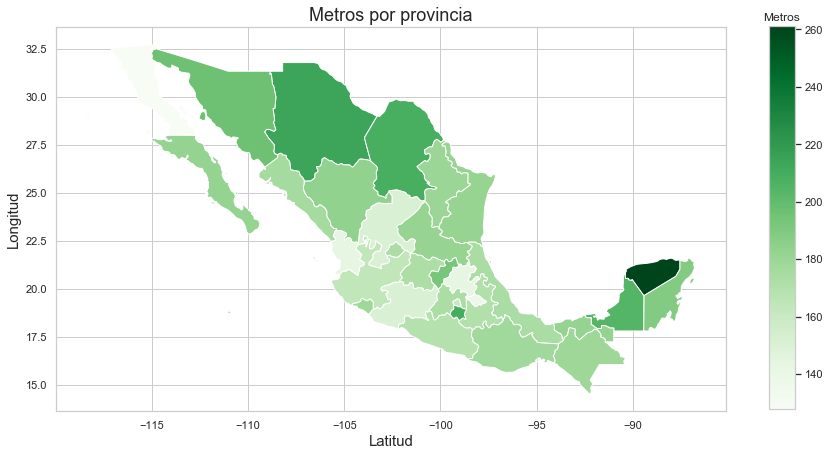

In [56]:
# plot as usual, grab the axes 'ax' returned by the plot
colormap = "Greens"   # add _r to reverse the colormap
ax = mexico_states.plot(column='metrostotales', cmap=colormap, \
                figsize=[12,9], \
                vmin=min(mexico_states.metrostotales), vmax=max(mexico_states.metrostotales))
plt.xlabel('Latitud', fontsize = 15)
plt.ylabel('Longitud', fontsize = 15)
# map marginal/face deco
ax.set_title('Metros por provincia', fontsize = 18)

# colorbar will be created by ...
fig = ax.get_figure()
# add colorbar axes to the figure
# here, need trial-and-error to get [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.95, 0.21, 0.03, 0.59])   

cbax.set_title('Metros')
sm = plt.cm.ScalarMappable(cmap=colormap, \
                norm=plt.Normalize(vmin=min(mexico_states.metrostotales), vmax=max(mexico_states.metrostotales)))
# at this stage, 
# 'cbax' is just a blank axes, with un needed labels on x and y axes

# blank-out the array of the scalar mappable 'sm'
sm._A = []
# draw colorbar into 'cbax'
fig.colorbar(sm, cax=cbax, format="%d")

# dont use: plt.tight_layout()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3587425240>,
      dtype=object)

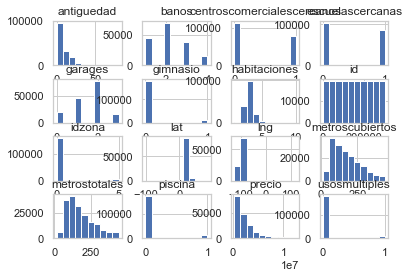

In [57]:
df_metrostotales.hist()

Text(0.5, 0, 'Provincia')

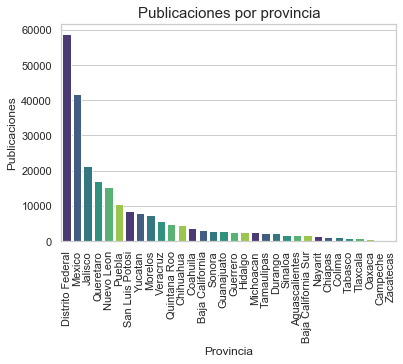

In [58]:
plt.xticks(rotation = 'vertical')
sns.barplot(data=publicaciones_por_provincia.sort_values(by = 'publicaciones', ascending = False), x='provincia',y='publicaciones', orient='v', palette = (sns.color_palette("viridis",)))
plt.title('Publicaciones por provincia', fontsize = 15)
plt.ylabel('Publicaciones', fontsize = 12)
plt.xlabel('Provincia', fontsize = 12)
#publicaciones_por_provincia

In [59]:
mexico_states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 20 columns):
OBJECTID          32 non-null int64
FIPS_ADMIN        32 non-null object
GMI_ADMIN         32 non-null object
provincia         32 non-null object
FIPS_CNTRY        32 non-null object
GMI_CNTRY         32 non-null object
CNTRY_NAME        32 non-null object
POP_ADMIN         32 non-null int64
TYPE_ENG          32 non-null object
TYPE_LOC          32 non-null object
SQKM              32 non-null float64
SQMI              32 non-null float64
COLOR_MAP         32 non-null object
Shape_Leng        32 non-null float64
Shape_Area        32 non-null float64
geometry          32 non-null object
precio            32 non-null float64
precio_dolares    32 non-null float64
antiguedad        32 non-null float64
metrostotales     32 non-null float64
dtypes: float64(8), int64(2), object(10)
memory usage: 5.1+ KB


In [60]:
mexico_states['precio_metro_dolares'] = mexico_states['precio_dolares'] / mexico_states['metrostotales']

In [61]:
mexico_states[['provincia', 'precio_metro_dolares']]

,provincia,precio_metro_dolares
0,Chihuahua,416.126549
1,Coahuila,367.513455
2,Nuevo Leon,769.931578
3,Tamaulipas,445.800280
4,Sinaloa,474.085270
5,Durango,335.289322
6,Zacatecas,491.196873
7,San Luis Potosi,538.837263
8,Jalisco,735.423945
9,Aguascalientes,434.756055


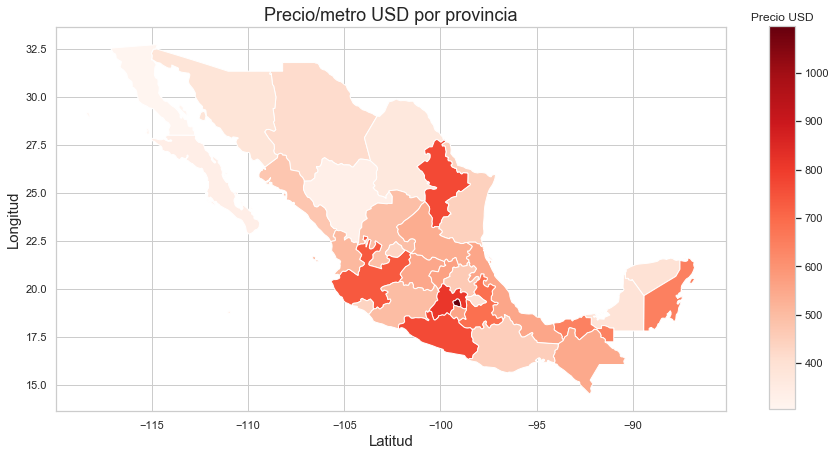

In [62]:
# plot as usual, grab the axes 'ax' returned by the plot
colormap = "Reds"   # add _r to reverse the colormap
ax = mexico_states.plot(column='precio_metro_dolares', cmap=colormap, \
                figsize=[12,9], \
                vmin=min(mexico_states.precio_metro_dolares), vmax=max(mexico_states.precio_metro_dolares))
plt.xlabel('Latitud', fontsize = 15)
plt.ylabel('Longitud', fontsize = 15)
# map marginal/face deco
ax.set_title('Precio/metro USD por provincia', fontsize = 18)

# colorbar will be created by ...
fig = ax.get_figure()
# add colorbar axes to the figure
# here, need trial-and-error to get [l,b,w,h] right
# l:left, b:bottom, w:width, h:height; in normalized unit (0-1)
cbax = fig.add_axes([0.95, 0.21, 0.03, 0.59])   

cbax.set_title('Precio USD')
sm = plt.cm.ScalarMappable(cmap=colormap, \
                norm=plt.Normalize(vmin=min(mexico_states.precio_metro_dolares), vmax=max(mexico_states.precio_metro_dolares)))
# at this stage, 
# 'cbax' is just a blank axes, with un needed labels on x and y axes

# blank-out the array of the scalar mappable 'sm'
sm._A = []
# draw colorbar into 'cbax'
fig.colorbar(sm, cax=cbax, format="%d")

# dont use: plt.tight_layout()
plt.show()

Text(0.5, 0, 'Tipo de propiedad')

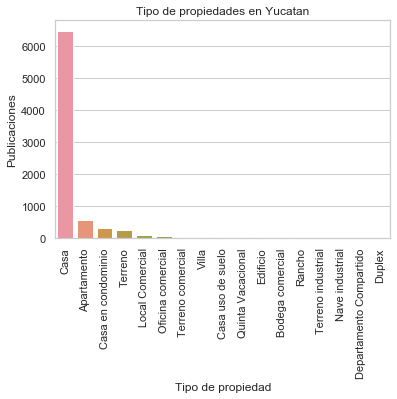

In [63]:
plt.xticks(rotation = 'vertical')
df_yucatan = df_props[df_props.provincia == 'Yucatan']
ax = sns.countplot(x="tipodepropiedad", data=df_yucatan, order = df_yucatan['tipodepropiedad'].value_counts().index)
plt.title('Tipo de propiedades en Yucatan')
plt.ylabel('Publicaciones', fontsize = 12)
plt.xlabel('Tipo de propiedad', fontsize = 12)
#publicaciones_por_provincia

Text(0.5, 0, 'Tipo de propiedad')

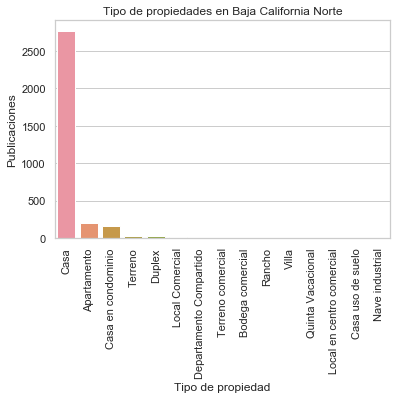

In [64]:
plt.xticks(rotation = 'vertical')
df_yucatan = df_props[df_props.provincia == 'Baja California']
ax = sns.countplot(x="tipodepropiedad", data=df_yucatan, order = df_yucatan['tipodepropiedad'].value_counts().index)
plt.title('Tipo de propiedades en Baja California Norte')
plt.ylabel('Publicaciones', fontsize = 12)
plt.xlabel('Tipo de propiedad', fontsize = 12)
#publicaciones_por_provincia